In [1]:
import numpy as np
import sys, os, h5py, re
sys.path.append('..')
sys.path.append("../..")
import matplotlib.pyplot as plt
from learning_utils import prepare_data_flexdmp, calc_loss_flexdmp
from check_dyn import plot_res_6dof

In [2]:
# just for dyna error calc
from casadi_kinodynamics.utils import symbolic_robot
sym_robot = symbolic_robot.symbolic_robot(robot_name='IRB1100_4_058',
                                          tool_mass=.5,
                                          tool_frame=[0., 0., 0.25, 0., 0., 0.],
                                          tool_cog=[0.0, 0., 0.12],
                                          tool_inertia=[
                                              0., 0., 0., 0., 0., 0.],
                                          load_casadi_fnc=True)

In [3]:
from trajencoder.flexdmp.flexdmp import FlexDMP
from algpr.kernels import RBF
from algpr.ppgpr import PPGPR
# active learning environment
from data.collect_data_6dof import Env6dof

## Full offline, optimal experiment design

In [26]:
# give a .1% duration, for the Aula will violate the constraints a little bit
q_min, q_max = sym_robot.q_min, sym_robot.q_max
lbx = [q_min[i]*.999 for i in range(1)] + [q_min[i]*.999 for i in range(1)]
ubx = [q_max[i]*.999 for i in range(1)] + [q_max[i]*.999 for i in range(1)]

In [27]:
bounds = np.concatenate([np.array(lbx).reshape(-1,1), np.array(ubx).reshape(-1,1)], axis=1)

In [6]:
lbx = np.array(lbx)
ubx = np.array(ubx)
lbx -= mean.squeeze()
lbx /= norm_factor.squeeze()
ubx -= mean.squeeze()
ubx /= norm_factor.squeeze()
lbx = lbx.tolist()
ubx = ubx.tolist()

In [29]:
# container
Xinit = np.random.uniform(lbx, ubx).reshape(1,-1)
kernel = RBF(l=[0.95]*2, anisotropic=True)
noise_level = 0.
N = 50
P = 2

In [30]:
Xres = PPGPR.max_mulinfo_X(lbx, ubx, Xinit, kernel, P, noise_level, N, solve_type='full')

100%|███████████████████████████████████████████| 50/50 [01:06<00:00,  1.32s/it]


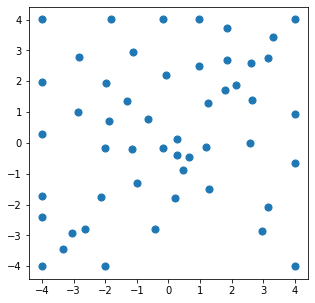

In [31]:
plt.figure(figsize=[5,5])
# for i in range(1,6):
#     plt.subplot(int("15{}".format(i)))
plt.scatter(Xres[:,0], Xres[:,1], s=50)
plt.savefig("/home/jiayun/Desktop/asd.jpg", dpi=200)

## TODO, cylinder sampling, mutual information criterion.